<a href="https://colab.research.google.com/github/JonaBaron/MNIST-dataset/blob/main/Project1_COMP472_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1
In this project, you will develop a machine learning app that classifies handwritten digits (0–9) from the
MNIST dataset. You will need to use at least 2 libraries:
1. NumPy for data exploration and manipulation.
2. scikit-learn to build a simple baseline model using logistic regression

##Import the data

In [191]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [192]:
digits = datasets.load_digits()

##Visualize the data

In [193]:
digits.images.shape

(1797, 8, 8)

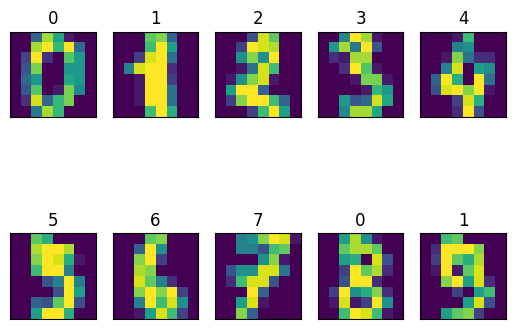

In [194]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i])
    plt.title(digits.feature_names[i][-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

##Reshape(normalize) the data and create the model

##Looking at the variables

In [195]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [196]:
label_unique = np.unique(digits.target)
label_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [197]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [198]:
digits.images.shape

(1797, 8, 8)

In [199]:
n_samples,data

(1797,
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

In [200]:
data.shape

(1797, 64)

##Split the data


*   80% for training
*   20% for testing



In [201]:
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [202]:
x_train.shape, x_test.shape, round(1797*0.8), round(1797*0.2)

((1437, 64), (360, 64), 1438, 359)

##Scaling normalizes the data

In [203]:
np.unique(x_train[0]) ##Scale of 0 to 15

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [204]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) ## Scale train
x_test_scaled = scaler.transform(x_test) ##Scale test

In [205]:
x_train.shape, x_train_scaled.shape

((1437, 64), (1437, 64))

In [206]:
np.unique(x_train_scaled[0])

array([-1.73928092, -1.62523622, -1.48142464, -1.4332488 , -1.1741969 ,
       -1.14356326, -1.10645423, -1.05144093, -0.87029728, -0.8537416 ,
       -0.82536045, -0.76375874, -0.71421442, -0.63568186, -0.52687507,
       -0.41675162, -0.41006063, -0.33165896, -0.30167492, -0.22542432,
       -0.21441553, -0.13864086, -0.13381696, -0.12274266, -0.09224992,
       -0.06609341, -0.05995125, -0.05806465, -0.0528332 , -0.04991522,
       -0.03963009, -0.03733267, -0.03716776, -0.02638899,  0.        ,
        0.04759885,  0.05343504,  0.08955416,  0.09149338,  0.09321053,
        0.14662408,  0.20563552,  0.28417793,  0.46875645,  0.47408023,
        0.4787287 ,  0.52361448,  0.57008846,  0.6325467 ,  0.67377143,
        0.70258091,  0.78015872,  0.78503835,  0.80147041,  0.83562121,
        0.85327807,  0.90303925,  1.10694541,  1.14756698,  1.46235249,
        1.53110302,  1.82499316])

##Model creation

In [207]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=16)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

##Visualize the prediction

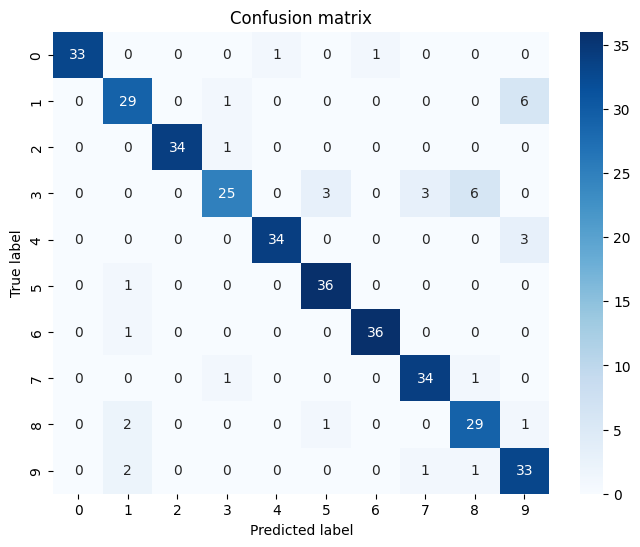

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_unique, yticklabels=label_unique)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

##See the metrics to see the model accuracy

In [209]:
from sklearn.metrics import classification_report
import pandas as pd

target_names = pd.Series(label_unique).astype(str)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.83      0.81      0.82        36
           2       1.00      0.97      0.99        35
           3       0.89      0.68      0.77        37
           4       0.97      0.92      0.94        37
           5       0.90      0.97      0.94        37
           6       0.97      0.97      0.97        37
           7       0.89      0.94      0.92        36
           8       0.78      0.88      0.83        33
           9       0.77      0.89      0.82        37

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360

